## Improving Deep Neural Networks - Course 2 - Andrew Ng
Model with different optimization algorithm
### He Initialization
He Initialization: this is named for the first author of He et al., 2015. If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of sqrt(1./layers_dims[l-1]) where He initialization would use sqrt(2./layers_dims[l-1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def init_params_he(layer_dims):
    params = {}
    L = len(layer_dims)
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * math.sqrt(2 / layer_dims[l-1])
        params['b' + str(l)] = np.zeros((layer_dims[l], 1))     
    return params

### Optimization
* (Batch) Gradient Descent:
```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost += compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
```
* Stochastic Gradient Descent:
```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):   # 1 training example at a time
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost += compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```
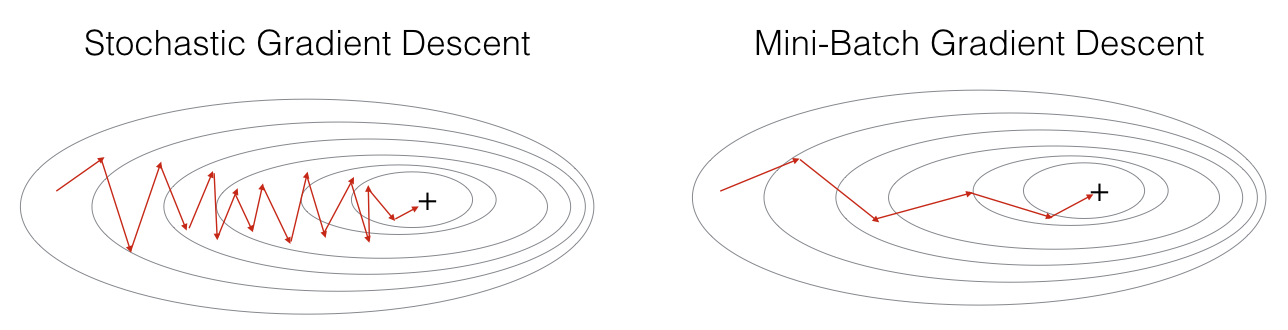

### 1. (Batch) Gradient Descent
A simple optimization method, where you take gradient steps with respect to all m training examples on each step. It is also called Batch Gradient Descent

In [3]:
def update_params_with_gd(params, grads, lr):
    L = len(params) // 2
    for l in range(L):
        params['W' + str(l+1)] = params['W' + str(l+1)] - lr * grads['dW' + str(l+1)]
        params['b' + str(l+1)] = params['b' + str(l+1)] - lr * grads['db' + str(l+1)]
    return params

### 2. Mini-Batch Gradient Descent
A variant of (Batch) Gradient Descent is Stochastic Gradient Descent (SGD), which is equivalent to Mini-Batch Gradient Fescent where each mini-batch has just 1 example. The update rule that you have just implemented does not change. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples above illustrate the difference between stochastic gradient descent and (batch) gradient descent.

In [4]:
def random_mini_batches(X, y, mini_batch_size=64, seed=0):
    """
    Creates a list of random minibatches from (X, y)    
    Arguments:
    X -- input data, of shape (input/features size, number of examples)
    y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_y)
    """
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []

    # step 1: shuffle (X, y)
    permutation = list(np.random.permutation(m))
    X_shuffled = X[:, permutation]
    y_shuffled = y[:, permutation]

    # step 2: partition (shuffle_X, shuffle_y), handle the end case
    n_batches = math.floor(m / mini_batch_size)
    for k in range(n_batches):
        mini_batch_X = X_shuffled[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_y = y_shuffled[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batches.append((mini_batch_X, mini_batch_y))

    if m % mini_batch_size != 0:
        mini_batch_X = X_shuffled[:, int(m/mini_batch_size)*mini_batch_size:]
        mini_batch_y = y_shuffled[:, int(m/mini_batch_size)*mini_batch_size:]
        mini_batches.append((mini_batch_X, mini_batch_y))

    return mini_batches

In [18]:
permutation = list(np.random.permutation(10))
permutation

[5, 6, 8, 9, 1, 2, 0, 4, 7, 3]

In [16]:
y = np.random.randint(10, size=(1, 10))
y

array([[0, 4, 1, 9, 5, 1, 0, 4, 2, 1]])

In [22]:
y[:, permutation]

array([[1, 0, 2, 1, 4, 1, 0, 5, 4, 9]])

In [29]:
int(5.8)

5

### 3. Momentum
Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations.

Momentum takes into account the past gradients to smooth out the update. We will store the 'direction' of the previous gradients in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill.

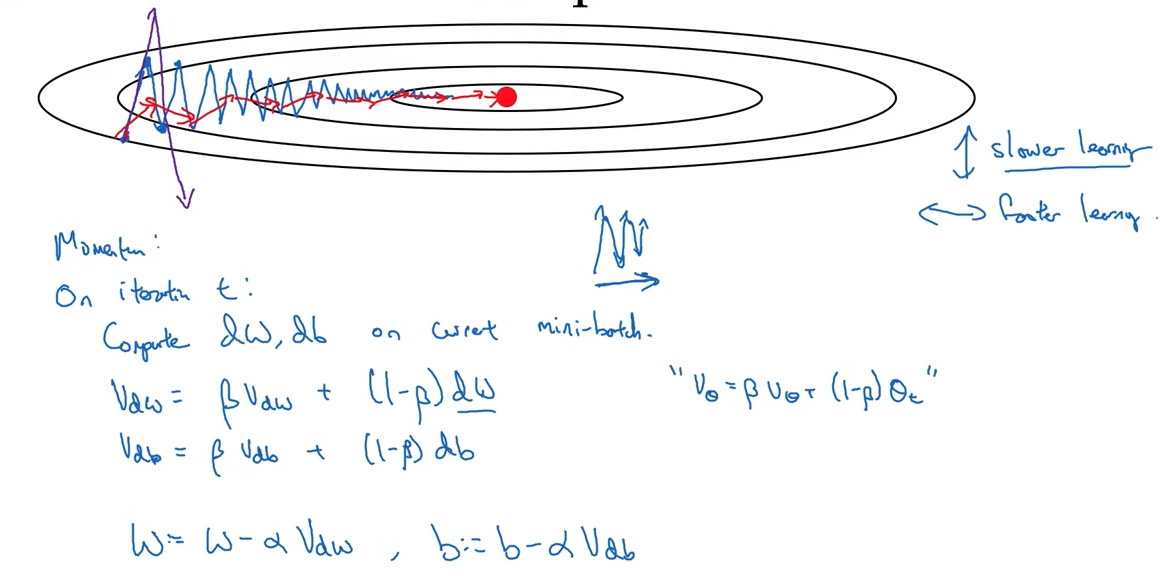

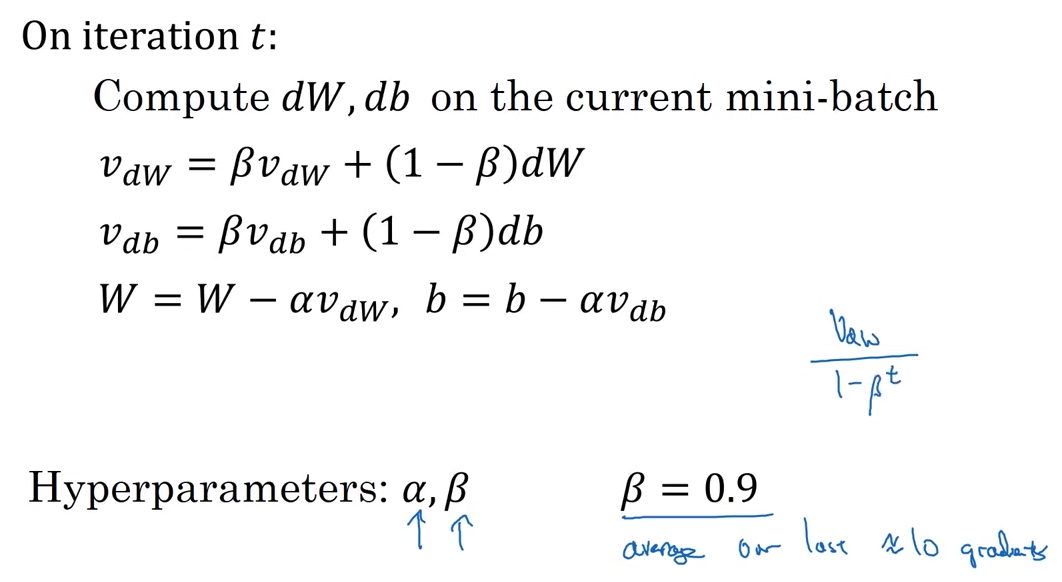

Note: in practice people don't usually use the bias correction: $\frac{V_{dw}}{1 - \beta^{t}}$, because after just 10 iterations (for $\beta = 0.9$) your moving average will have warmed up.

In [5]:
def init_velocity(params):
    L = len(params)//2
    v = {}
    for l in range(L):
        v['dW' + str(l+1)] = np.zeros((params['W' + str(l+1)].shape[0], params['W' + str(l+1)].shape[1]))
        v['db' + str(l+1)] = np.zeros((params['b' + str(l+1)].shape[0], params['b' + str(l+1)].shape[1]))
    return v

def update_params_with_momentum(params, grads, v, beta, lr):
    L = len(params)//2
    for l in range(L):
        v['dW' + str(l+1)] = beta * v['dW' + str(l+1)] + (1-beta) * grads['dW' + str(l+1)]
        v['db' + str(l+1)] = beta * v['db' + str(l+1)] + (1-beta) * grads['db' + str(l+1)]
        params['W' + str(l+1)] = params['W' + str(l+1)] - lr * v['dW' + str(l+1)]
        params['b' + str(l+1)] = params['b' + str(l+1)] - lr * v['db' + str(l+1)]
    return params, v

### 4. Adam
Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, we will store all parameters in the `params` dictionary

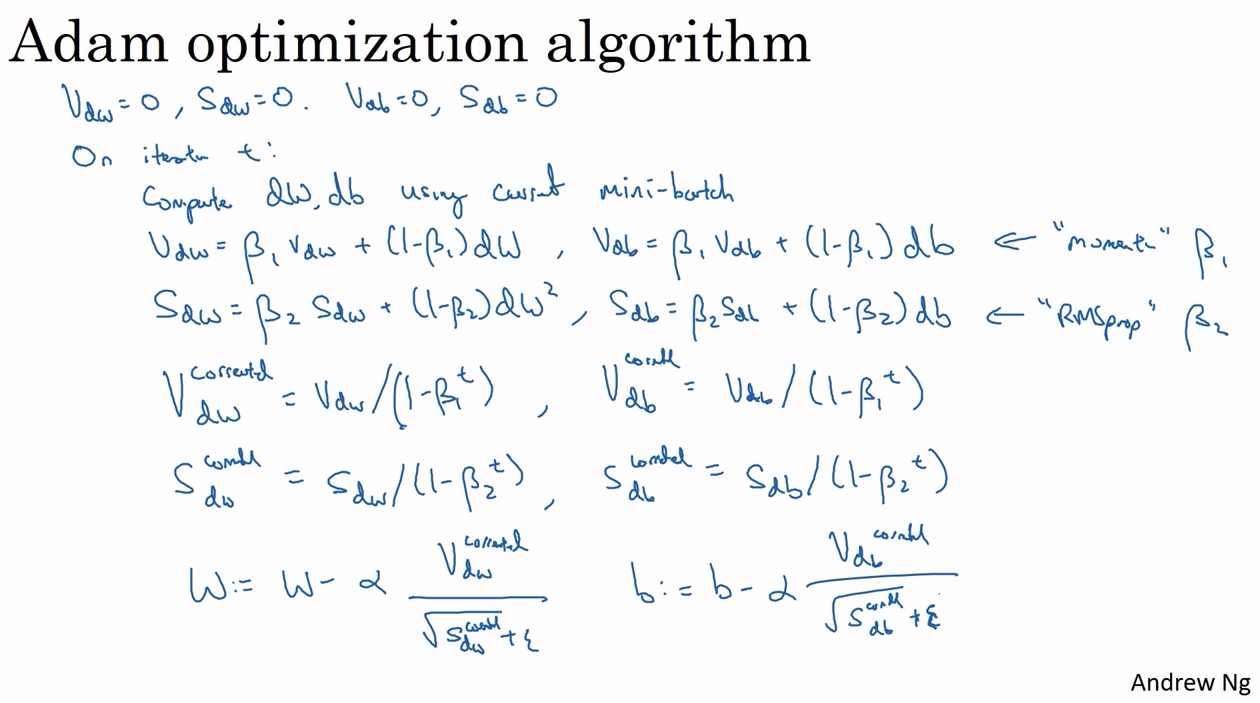

**Typical hyperparameters values**:

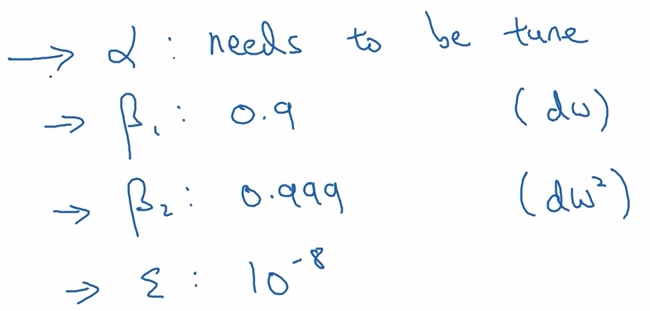

In [6]:
def init_adam(params):
    L = len(params)//2
    v = {}
    s = {}
    for l in range(L):
        v['dW' + str(l+1)] = np.zeros((params['W' + str(l+1)].shape[0], params['W' + str(l+1)].shape[1]))
        v['db' + str(l+1)] = np.zeros((params['b' + str(l+1)].shape[0], params['b' + str(l+1)].shape[1]))
        s['dW' + str(l+1)] = np.zeros((params['W' + str(l+1)].shape[0], params['W' + str(l+1)].shape[1]))
        s['db' + str(l+1)] = np.zeros((params['b' + str(l+1)].shape[0], params['b' + str(l+1)].shape[1]))
    return v, s

def update_params_with_adam(params, grads, v, s, t, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(params)//2
    v_corrected = {}
    s_corrected = {}
    for l in range(L):
        # moving average of the gradients
        v['dW' + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dW' + str(l+1)]
        v['db' + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]

        # moving average of the squared gradients
        s['dW' + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.square(grads['dW' + str(l+1)])
        s['db' + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.square(grads['db' + str(l+1)])

        # bias-corrected first moment estimate
        v_corrected['dW' + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected['db' + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))

        # bias-corrected second moment estimate
        s_corrected['dW' + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected['db' + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))

        # update parameters
        params['W' + str(l+1)] -= lr * v_corrected['dW' + str(l+1)] / (np.sqrt(s_corrected['dW' + str(l+1)])+epsilon)
        params['b' + str(l+1)] -= lr * v_corrected['db' + str(l+1)] / (np.sqrt(s_corrected['db' + str(l+1)])+epsilon)
    return params, v, s

### Hyperparameters Tuning
* Typical order of importance when tuning hyperparameters: $\alpha$, #layers, learning rate decay, $\beta$, #hidden units, mini-batch size
* Try random values: don't use a grid

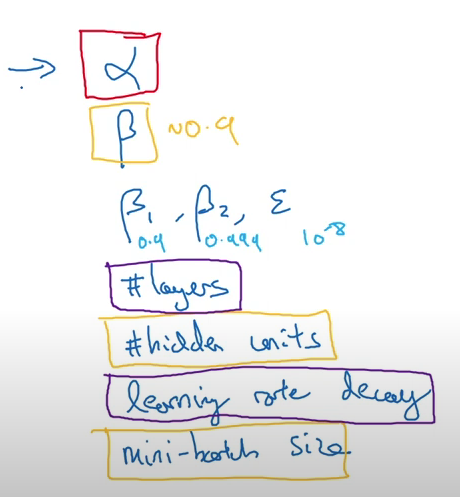

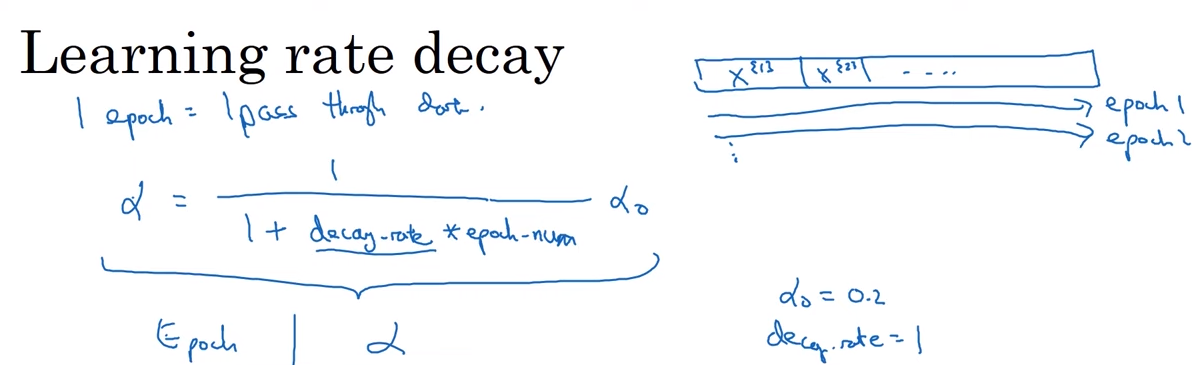

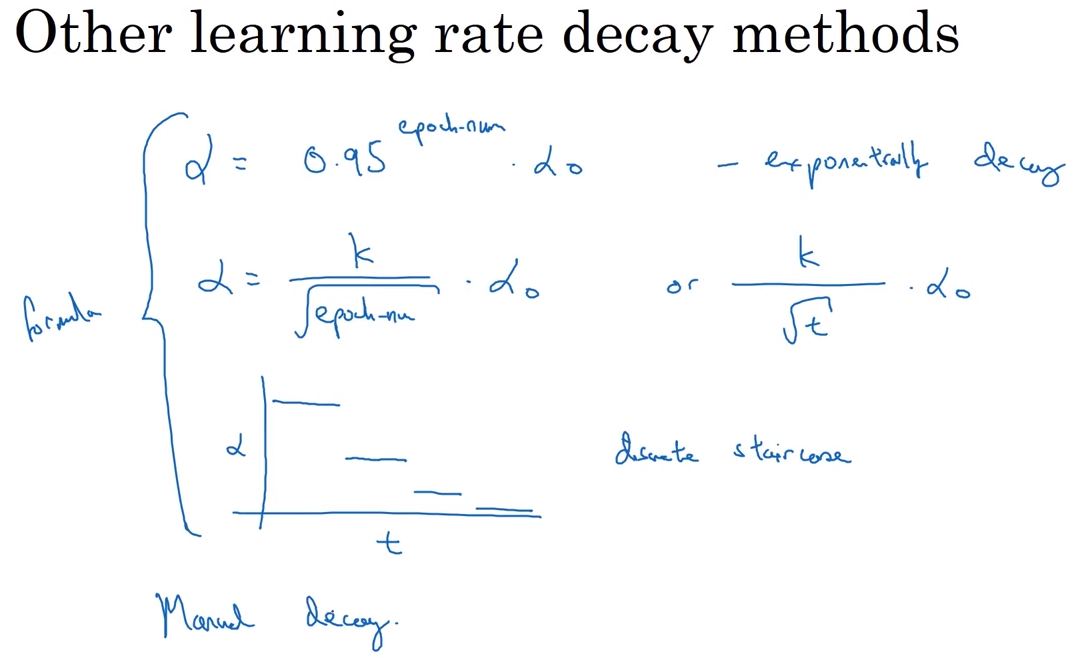

* **Appropriate scale (range) for searching hyperparameters**
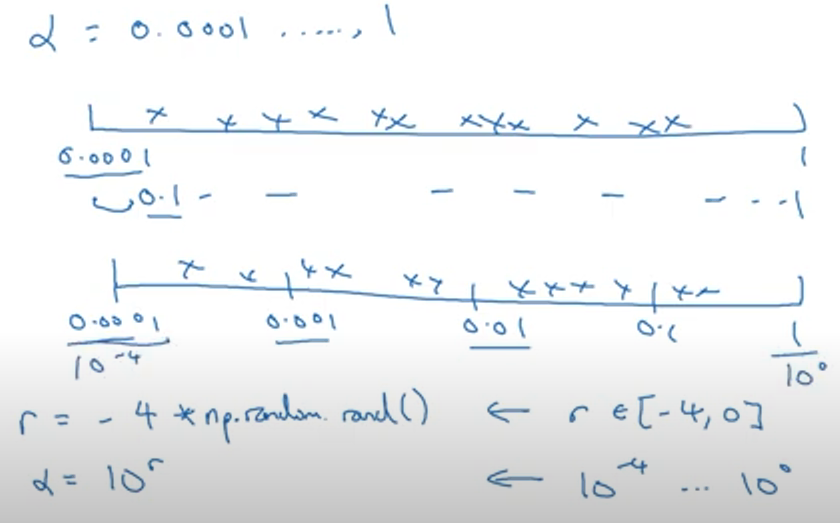

In [7]:
# np.random.rand: Create an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1)
np.random.rand(5)

array([0.16872348, 0.9546413 , 0.22047655, 0.7008994 , 0.99962592])

In [8]:
r = -4 * np.random.rand(5)
r

array([-1.21280206, -3.62515358, -3.58228067, -1.44332786, -3.72538506])

In [9]:
alpha = 10**r
alpha

array([0.06126295, 0.00023705, 0.00026165, 0.03603065, 0.0001882 ])

### 5. Model with Different Optimization Algorithm
Lets use the following "moons" dataset to test the different optimization methods. The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.

In [23]:
from sklearn.datasets import make_moons

In [24]:
def load_moons_dataset():
    np.random.seed(3)
    X_train, y_train = make_moons(n_samples=300, noise=.2)
    
    # visualize the data
    plt.figure(figsize=(4, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=15, cmap=plt.cm.Spectral);
    X_train = X_train.T
    y_train = y_train.reshape((1, y_train.size))

    return X_train, y_train

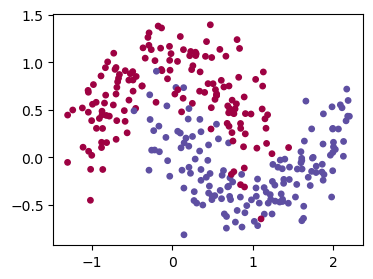

In [25]:
X_train, y_train = load_moons_dataset()

In [26]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (2, 300)
y_train shape: (1, 300)


**Neural Network structure**

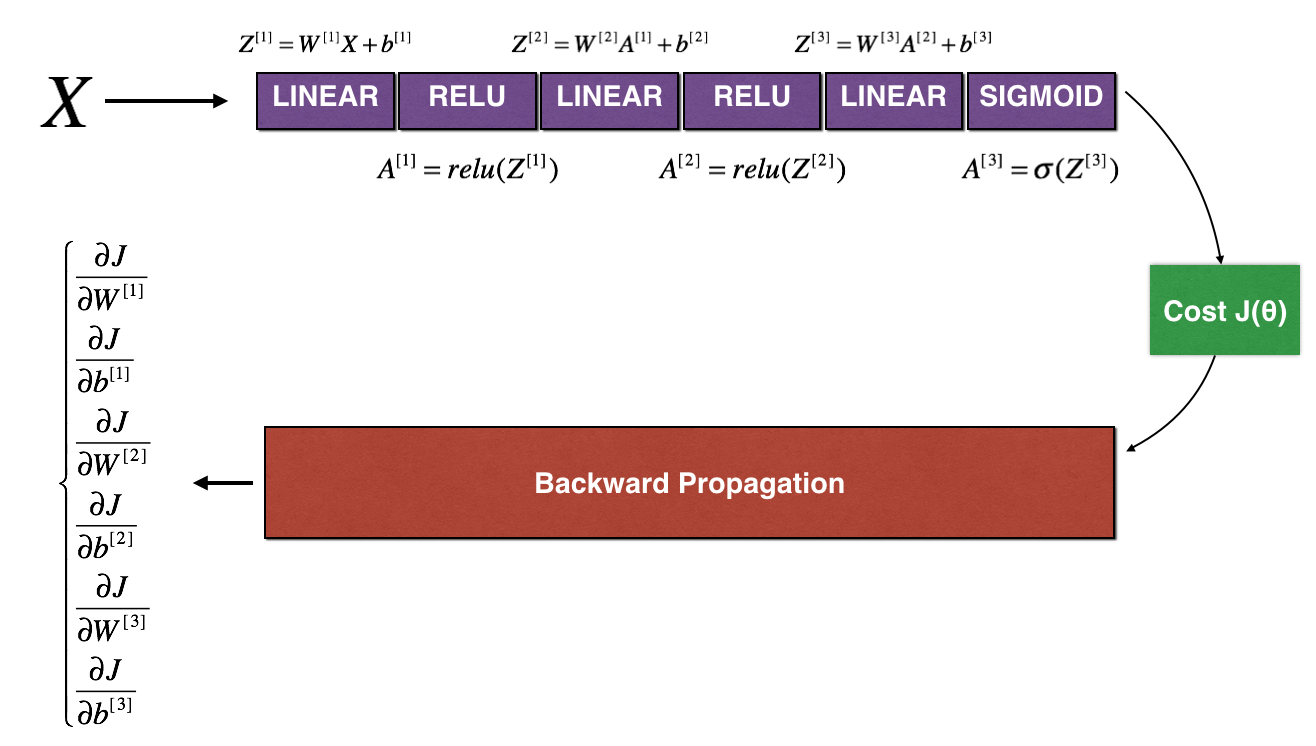

In [36]:
# Utils functiona
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, params):
    # retrieve parameters
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    return A3, cache

def backward_propagation(X, y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = (1/m) * (A3 - y)
    dW3 = np.dot(dZ3, A2.T)
    db3 = np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * np.int64(A2 > 0)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * np.int64(A1 > 0)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    grads = {'dZ3': dZ3, 'dW3': dW3, 'db3': db3,
             'dA2': dA2, 'dZ2': dZ2, 'dW2': dW2, 'db2': db2,
             'dA1': dA1, 'dZ1': dZ1, 'dW1': dW1, 'db1': db1}
    return grads


def compute_cost(A3, y):
    epsilon = 1e-5 
    log_probs = -(y * np.log(A3 + epsilon) + (1 - y) * np.log(1 - A3 + epsilon))
    cost = np.sum(log_probs)
    return cost

def predict(X, y, params):
    m = X.shape[1]
    preds = np.zeros((1, m))

    # forward propagation
    A3, cache = forward_propagation(X, params)

    # convert probas to zero-one predictions
    for i in range(A3.shape[1]):
        if A3[0, i] > 0.5:
            preds[0, i] = 1
        else:
            preds[0, i] = 0

    print('Accuracy: ' + str(np.mean(preds[0, :] == y[0, :])))
    return preds

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

In [14]:
r = np.random.randn(10)
r

array([ 0.95051662, -1.51685988, -0.29302369,  0.75639831, -0.00225306,
       -0.23142737,  0.17375507, -0.91391285, -0.40583997, -1.37505555])

In [15]:
np.int64(r > 0)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
def model(X, y, layer_dims, optimizer, lr=0.0007, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.99,
         epsilon=1e-8, n_epochs=10000, print_cost=True):
    L = len(layer_dims)
    costs = []
    t = 0
    seed = 10
    m = X.shape[1]
    print("The number of training examples is : %i" % m)
    print("The mini-batch size : %i" % mini_batch_size)

    # initialize parameters
    params = init_params_he(layer_dims)

    # initialize the optimizer
    if optimizer == 'gd':
        pass    # no initialization required for gradient descent
    elif optimizer == 'momentum':
        v = init_velocity(params)
    elif optimizer == 'adam':
        v, s = init_adam(params)

    # optimization loop
    for i in range(n_epochs):
        # define the random mini-batches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, y, mini_batch_size, seed)
        cost_total = 0

        for minibatch in minibatches:
            X_minibatch, y_minibatch = minibatch

            # forward propagation
            A3, cache = forward_propagation(X_minibatch, params)

            # compute cost and add to the cost_total
            cost_total += compute_cost(A3, y_minibatch)

            # backward propagation
            grads = backward_propagation(X_minibatch, y_minibatch, cache)

            # update parameters
            if optimizer == 'gd':
                params = update_params_with_gd(params, grads, lr)
            elif optimizer == 'momentum':
                params, v = update_params_with_momentum(params, grads, v, beta, lr)
            elif optimizer == 'adam':
                t = t + 1     # adam counter
                params, v, s = update_params_with_adam(params, grads, v, s, t, lr, beta1, beta2, epsilon)

        cost_avg = cost_total / m

        # print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print('Cost after epoch %i: %f' % (i, cost_avg))
        if i % 100 == 0:
            print('Cost after epoch %i: %f' % (i, cost_avg))
            costs.append(cost_avg)

    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Epochs (per 100)')
    plt.title('Learning rate = ' + str(lr))
    plt.show()
    return params

The number of training examples is : 300
The mini-batch size : 64
Cost after epoch 0: 0.703643
Cost after epoch 1000: 0.442071
Cost after epoch 2000: 0.397417
Cost after epoch 3000: 0.379735
Cost after epoch 4000: 0.370886
Cost after epoch 5000: 0.365778
Cost after epoch 6000: 0.362000
Cost after epoch 7000: 0.358123
Cost after epoch 8000: 0.354674
Cost after epoch 9000: 0.350419


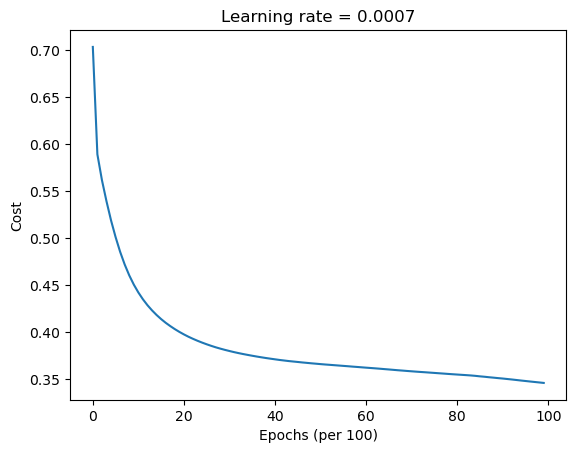

In [58]:
layer_dims = [X_train.shape[0], 5, 2, 1]
params = model(X_train, y_train, layer_dims, optimizer='gd')

In [41]:
predictions = predict(X_train, y_train, params)

Accuracy: 0.8766666666666667


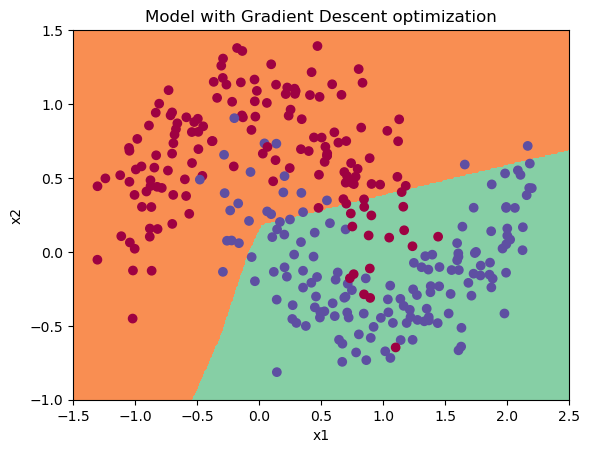

In [59]:
# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, y_train)

The number of training examples is : 300
The mini-batch size : 64
Cost after epoch 0: 0.730706
Cost after epoch 1000: 0.422848
Cost after epoch 2000: 0.374069
Cost after epoch 3000: 0.357574
Cost after epoch 4000: 0.342463
Cost after epoch 5000: 0.333380
Cost after epoch 6000: 0.325607
Cost after epoch 7000: 0.320231
Cost after epoch 8000: 0.314640
Cost after epoch 9000: 0.309577


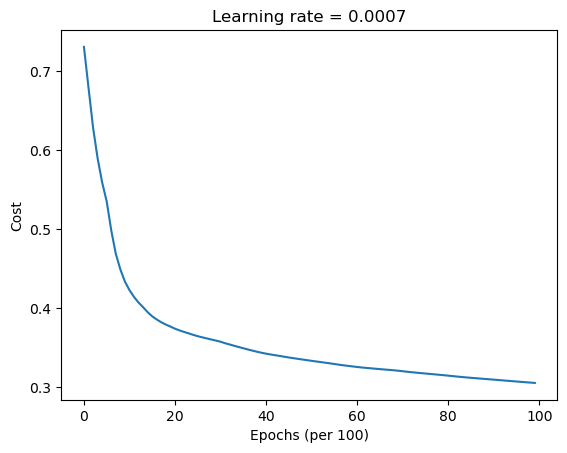

In [77]:
layer_dims = [X_train.shape[0], 5, 2, 1]
params = model(X_train, y_train, layer_dims, optimizer='momentum')

In [79]:
predictions = predict(X_train, y_train, params)

Accuracy: 0.8766666666666667


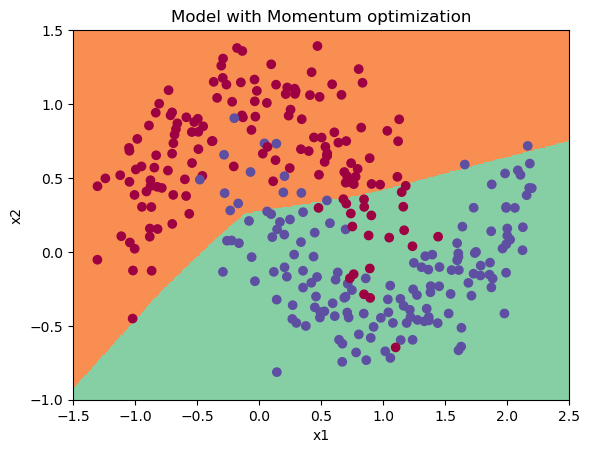

In [78]:
# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, y_train)

The number of training examples is : 300
The mini-batch size : 64
Cost after epoch 0: 0.729159
Cost after epoch 1000: 0.167028
Cost after epoch 2000: 0.138326
Cost after epoch 3000: 0.135056
Cost after epoch 4000: 0.133925
Cost after epoch 5000: 0.133313
Cost after epoch 6000: 0.132851
Cost after epoch 7000: 0.132433
Cost after epoch 8000: 0.132220
Cost after epoch 9000: 0.132079


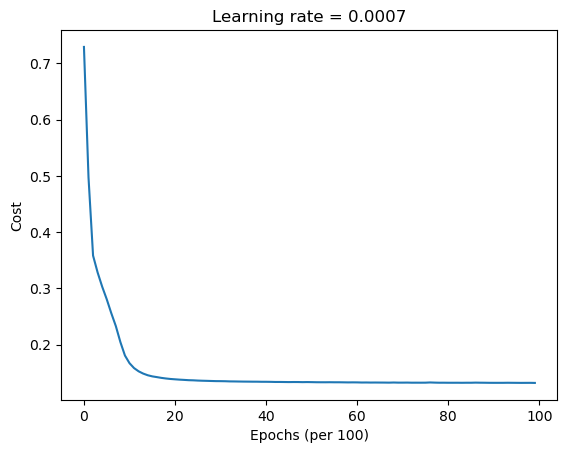

In [82]:
layer_dims = [X_train.shape[0], 5, 2, 1]
params = model(X_train, y_train, layer_dims, optimizer='adam')

In [83]:
predictions = predict(X_train, y_train, params)

Accuracy: 0.9366666666666666


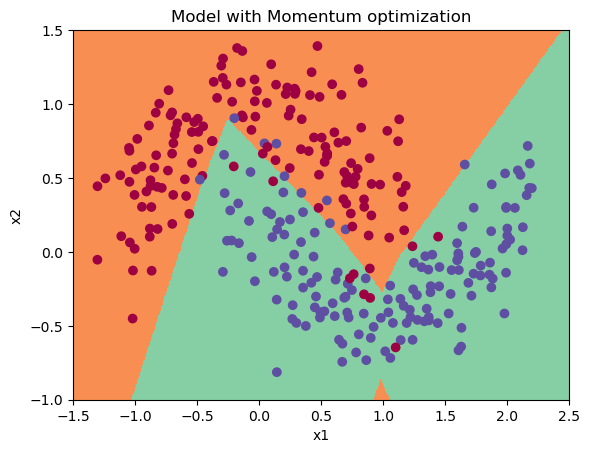

In [84]:
# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, y_train)